# DSCI 503 – Project 02
### Matt Snyder

In [39]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
Create a function that simulates a stock's daily price fluctuations using a normal distribution with std dev to reflect variability

In [40]:
def simulate_stock (start, rate, vol, days):
    """ This function will randomly generate a simulated sequence of daily stock prices
        (which we will call a run) based on several parameters. A description of this function is found below.
            start will represent the current price of the stock. This will be the starting price for the run.
            rate will be the expected annual yield rate for the stock.
            vol will be the annual volatility of the stock. This is a measure of how much uncertainty there is in the 
                future price of the stock. Stock with a higher volatility will have prices that are a lot "swingier". 
            days will be the number of days into the future that we would like to simulate prices.
        The function returns an array that contains days + 1 elements. The first element of the returned array is
        the starting price, start, while the later elements are the simulated stock prices. 
    """
    # Use np.random.normal to create an array of randomly generated daily yields. The mean (loc) should be set to
    # rate/252 and the standard deviation (scale) should be set to vol/(252**0.5). The number of elements in
    # this array should be equal to days. I suggest naming the array daily_yields.
    daily_yields = np.random.normal(loc=rate/252, scale=vol/(252**0.5), size=days)
    
    # 2. To calculate the simulated stock price at the end of each day, we need to know the cumulative yields. Use
    # np.cumsum to calculate this. I suggest naming the results cumulative_yields.
    cumulative_yields = np.cumsum(daily_yields)
    
    # Create an array called daily_multipliers by exponentiating each of the cumulative yields. You can accomplish this using np.exp.
    daily_multipliers = np.exp(cumulative_yields)
    
    # Multiply the daily multipliers by the starting price to get the simulated daily prices for each day. Round these
    # simulated prices to 2 decimal places.
    daily_prices = np.round(daily_multipliers * start, 2)
    
    # The number of elements in the array that you have created should be equal to days. We wish to add the starting
    # price to the beginning of this array. You can accomplish this using np.concatenate.
    result = np.concatenate((np.array([start]), daily_prices))
    
    # Return the array of days + 1 elements created in Step 5.
    return result

### Test Stock Simulation function
Test the above function with fixed random seed and known output for that seed

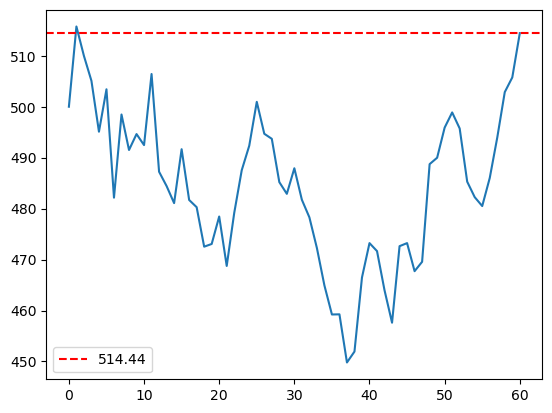

In [54]:
np.random.seed(1)

# Simulate 60 daily prices for a stock with a current price of 500, an expected annual return of 8%, and an annual
# volatility of 0.3. Store the result in a variable.
test_run = simulate_stock(500, 0.08, 0.3, 60)

# Display the prices using a line plot.
plt.plot(range(0, len(test_run)), test_run)

# At the top of this cell, use numpy to set a random seed of 1. Run the cell again. If your function was written
# correctly, your simulated run should have a final price of 514.44.
plt.axhline(y=test_run[-1], color='red', linestyle='--', label=test_run[-1])
plt.legend()
plt.show()

## Part B: Annual Yield Function
Compute the annual yield of a stock, from a simulated run of daily prices

In [42]:
def find_yield(run):
    """ run is expected to be an array of simulated daily prices for a stock. 
        The function returns the annual yield for the stock over the simulated period, rounded to four decimal places.
    """
    result = math.log(run[-1]/run[0]) * 252 / (len(run)-1)
    return round(result, 4)

### Test Annual Yield Function
Test this function by running it on the previously simulated run

In [43]:
# Call the find_yield function on the run you created in Part A, printing the result. 
# If everything is correct, you should get 0.1196 as the result. 
print(find_yield(test_run))

0.1196


### Explore Variability
Explore the potential variability in our simulated runs by creating and plotting 25 simulated runs.

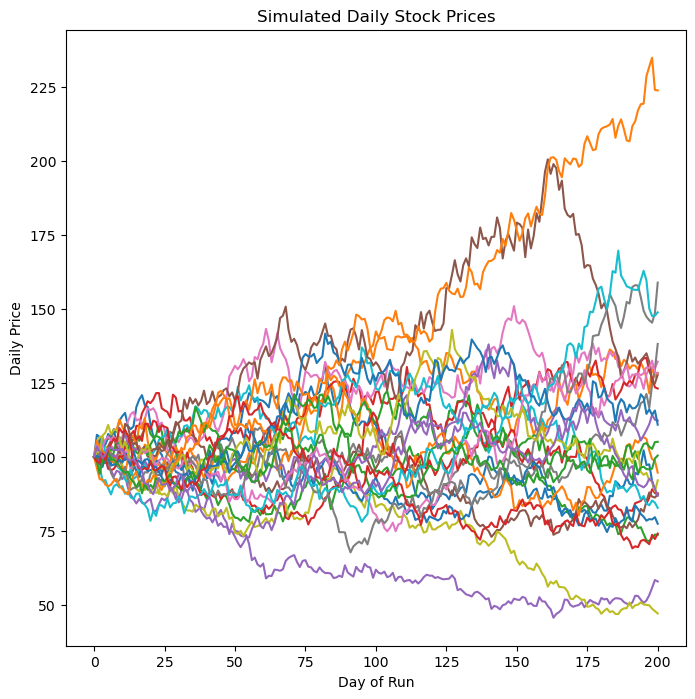

In [32]:
# use a loop to create 25 simulated runs for a stock with a current price of 100, an expected annual yield of 6%,
# and an annual volatility of 0.4 over a period of 200 days. Plot all 25 runs in the same line plot. 
# For each run, use find_yield to calculate the annual yield for the run, and store the value in a list.
plt.figure(figsize=[8,8])
annual_yields = []
for i in range(0, 25):
    run = simulate_stock(100, 0.06, 0.4, 200)
    annual_yields.append(find_yield(run))
    plt.plot(range(0, len(run)), run, label=i)

plt.xlabel('Day of Run')
plt.ylabel('Daily Price')
plt.title('Simulated Daily Stock Prices')
plt.show()

### List Annual Yields
Display the yields for the 25 simulated runs.

In [33]:
print (annual_yields)

[-0.1716, 0.3154, -0.385, -0.1654, -0.689, -0.1713, 0.3519, 0.4076, -0.9495, -0.2381, -0.3226, -0.0687, 0.0628, 0.2622, 0.1462, 0.3093, 0.3128, 0.5839, -0.1038, 0.5015, 0.1305, 1.0158, 0.0058, -0.3784, -0.1774]


## Part C: Finding Seeds that Generate Specific Outcomes
Manually set the seed of the random number generator in numpy, to obtain consistent results from simulation

In the cell below, Stock A has the highest simulated final price.

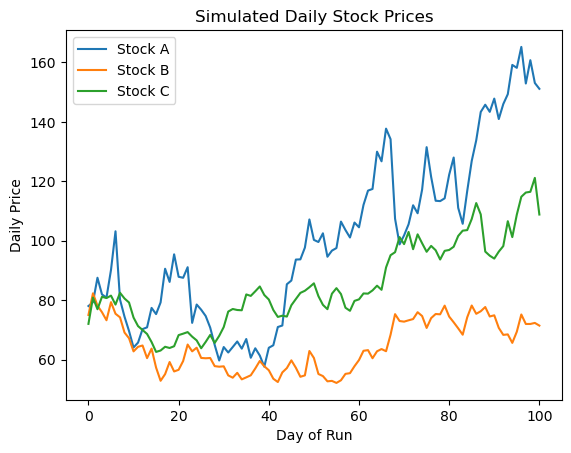

In [58]:
# Use numpy to set the random seed to an integer of your choice. 
np.random.seed(314159)

def simulate_three_stocks():
    # Stock A has a current price of 78, an expected annual return of 4%, and a volatility of 1.2.
    # Stock B has a current price of 75, an expected annual return of 8%, and a volatility of 0.8.
    # Stock C has a current price of 72, an expected annual return of 16%, and a volatility of 0.6.
    stock_characteristics = [('A', 78, 0.04, 1.2), ('B', 75, 0.08, 0.8), ('C', 72, 0.16, 0.6)]
    
    # Simulate daily runs for three stocks over a period of 100 days. 
    for stock in stock_characteristics:
        run = simulate_stock (start=stock[1], rate=stock[2], vol=stock[3], days=100)
        # Create line plots for all three runs on the same figure, including a legend indicating which line goes with which stock.
        plt.plot(range(0, len(run)), run, label=f'Stock {stock[0]}')
    
    plt.legend()
    plt.xlabel('Day of Run')
    plt.ylabel('Daily Price')
    plt.title('Simulated Daily Stock Prices')
    plt.show()

simulate_three_stocks()

In the cell below, Stock B has the highest simulated final price.

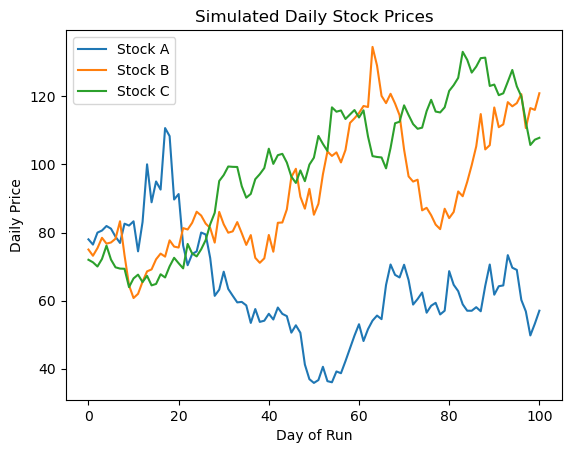

In [71]:
np.random.seed(159314)
simulate_three_stocks()

In the cell below, Stock C has the highest simulated final price.

In the cell below, Stock C has the highest simulated final price.

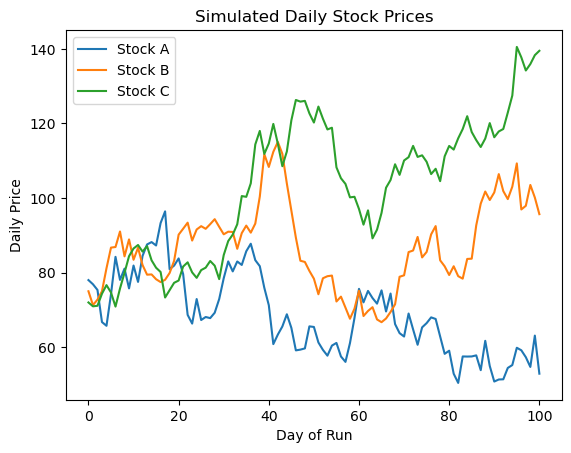

In [78]:
np.random.seed(314000)
simulate_three_stocks()

## Part D: Monte Carlo Simulation
Run a large number of simulations monte carlo style, and display a histogram to show the shape of the distribution

In [79]:
def monte_carlo(start, rate, vol, days, num_runs):
    """ The function uses a loop to generate a number of simulated stock runs equal to num_runs.
    """
    final_prices = []
    annual_yields = []
    for i in range(0, num_runs-1):
        # Simulate a run using the supplied parameters. Store the resulting array in a variable.
        run = simulate_stock (start=start, rate=rate, vol=vol, days=days)
        
        # Determine the final simulated price of the stock and append it into a list called final_prices.
        final_prices.append(run[-1])
        
        # Determine the annual yield for the simulated run and append it into a list called annual_yields.
        annual_yields.append(find_yield(run))

    # When the loop is done executing, convert the two lists you have constructed to numpy arrays and return both of them.
    return np.array(final_prices), np.array(annual_yields)

### Test the Monte Carlo function
Test the above function by running a Monte Carlo simulation with a specific seed.

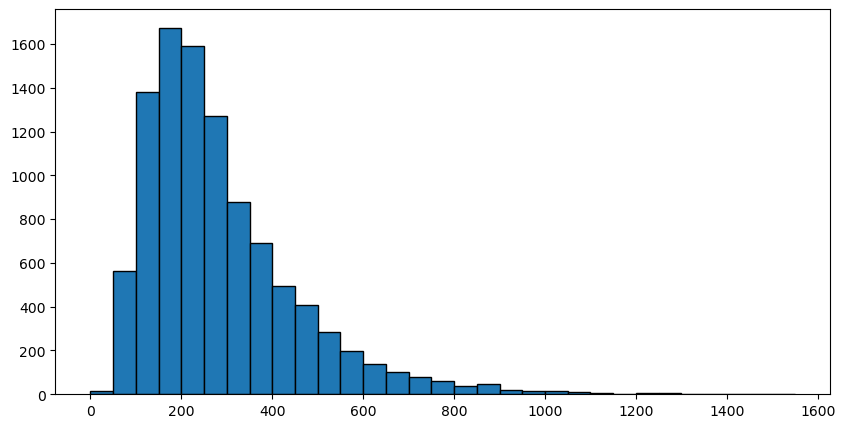

In [86]:
# Set a seed of 1
np.random.seed(1)
# run a Monte Carlo simulation consisting of 10,000 simulated runs for a stock with a current price of 200, 
# expected annual return of 10%, and a volatility of 0.4. Each run should be over a period of 500 days. 
mc_final_prices, mc_annual_yields = monte_carlo(200, 0.1, 0.4, 500, 10000)

# Create a histogram of the final prices. Use bins=np.arange(0, 1600, 50), and set the edgecolor to black. 
# Set the size of the figure to be [10,5].
plt.figure(figsize=[10,5])
plt.hist(mc_final_prices, edgecolor='black', bins=np.arange(0, 1600, 50))
plt.show()

### Display Percentiles
Display the 10th, 25th, 50th, 75th, and 90th percentiles of the simulated final prices.

In [87]:
# Use np.percentile to calculate the 10th, 25th, 50th, 75th, and 90th percentiles for the final prices in the simulated runs
percentiles = {}
for th in [10, 25, 50, 75, 90]:
    percentiles[th] = np.percentile(mc_final_prices, th)
    # Display the results by creating five lines of output, with each line using the following format: 
    print (f'{th}th percentile: {round(percentiles[th], 2)}') # Round the display percentiles to 2 decimal places.

# If done correctly, you should get a 10th percentile of 118.05 and a 90th percentile of 505.91.

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.52
90th percentile: 505.8


## Part E: Effects of Volatility
Compare the simulation distribution of two stocks with different volatility

In [90]:
# Set a seed of 1
np.random.seed(1)

# run Monte Carlo simulations for two stocks (Stock A and Stock B), each with 10,000 runs lasting
# over a period of 150 days. Both stocks being simulated have a current price of 100, and an expected annual yield of 12%.
# However, the Stock A has a volatility of 0.3, and Stock B has a volatility of 0.7.
final_price = {}
annual_yield = {}
avg_annual_yield = {}
final_price['A'], annual_yield['A'] = monte_carlo(start=100, rate=0.12, vol=0.3, days=150, num_runs=10000)
final_price['B'], annual_yield['B'] = monte_carlo(start=100, rate=0.12, vol=0.7, days=150, num_runs=10000)

# Calculate the average of the simulated annual yields for each stock, rounded to four decimal places. 
avg_annual_yield['A'] = round(np.mean(annual_yield['A']), 4)
avg_annual_yield['B'] = round(np.mean(annual_yield['B']), 4)

# Print the results in the following format
print (f'Average Annual Yield for A over 10000 runs: {avg_annual_yield['A']}')
print (f'Average Annual Yield for B over 10000 runs: {avg_annual_yield['B']}')


Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1127


### Histogram of Stocks with different Volatility
Visually inspect the results of the two Monte Carlo simulations by plotting histograms of the final prices.

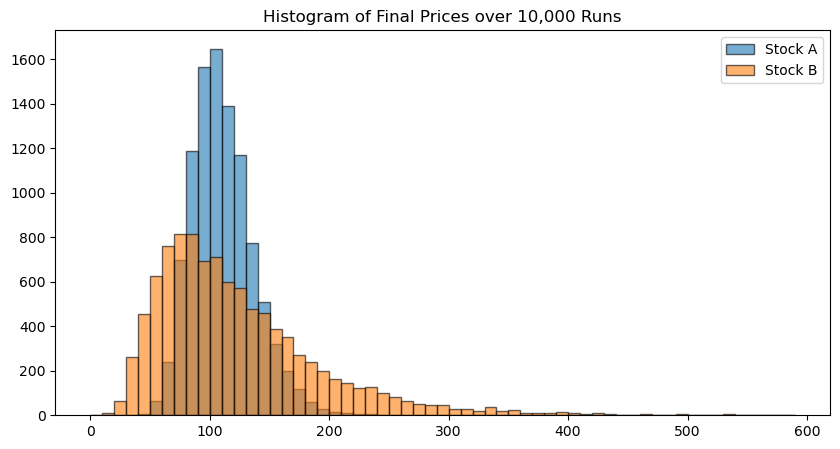

In [94]:
# Use plt.hist to create a figure with two histograms on the same axes. Each histogram should display the distribution of
# final prices for each stock over the 10,000 simulated runs in one of the two Monte Carlo simulations. Set a figure size of
# [10,5]. Set an alpha level of 0.6 and use np.arange(0,600, 10) for the bins in each plot. Set the edgecolor to black.
plt.figure(figsize=[10,5])
plt.hist(final_price['A'], edgecolor='black', alpha=0.6, bins=np.arange(0, 600, 10), label='Stock A')
plt.hist(final_price['B'], edgecolor='black', alpha=0.6, bins=np.arange(0, 600, 10), label='Stock B')

# Display a legend indicating which histogram is for which stock. Finally, set the title of the figure
plt.legend()
plt.title('Histogram of Final Prices over 10,000 Runs')
plt.show()


## Part F: Comparing Two Stocks

In [96]:
# Set a seed of 1
np.random.seed(1)

# run Monte Carlo simulations for two stocks (Stock A and Stock B), each with 10,000 runs lasting
# over a period of 252 days. Both stocks being simulated have a current price of 120. Stock A has an expected annual yield
# of 8% and a volatility of 0.2. Stock B has an expected annual yield of 5% and a volatility of 0.5.
final_price['A'], annual_yield['A'] = monte_carlo(start=120, rate=0.08, vol=0.2, days=252, num_runs=10000)
final_price['B'], annual_yield['B'] = monte_carlo(start=120, rate=0.05, vol=0.5, days=252, num_runs=10000)

# The proportion of the simulated runs in which Stock A has a higher final price than Stock B.
A_higher_than_B = np.sum(final_price['A'] > final_price['B']) / 10000
# The proportion of the simulated runs in which Stock A has a final price greater than 150.
A_higher_than_150 = np.sum(final_price['A'] > 150) / 10000
# The proportion of the simulated runs in which Stock B has a final price greater than 150.
B_higher_than_150 = np.sum(final_price['B'] > 150) / 10000
# The proportion of the simulated runs in which Stock A has a final price less than 100.
A_less_than_100 = np.sum(final_price['A'] < 100) / 10000
# The proportion of the simulated runs in which Stock B has a final price less than 100.
B_less_than_100 = np.sum(final_price['B'] < 100) / 10000

# Round all values to four decimal places
A_higher_than_B   = round(A_higher_than_B, 4)
A_higher_than_150 = round(A_higher_than_150, 4)
B_higher_than_150 = round(B_higher_than_150, 4)
A_less_than_100 = round(A_less_than_100, 4)
B_less_than_100 = round(B_less_than_100, 4)

# display your results in the following format:
print ('Proportions of runs in which...')
print ('-------------------------------')
print (f'A ends above B: {A_higher_than_B}')
print (f'A ends above 150: {A_higher_than_150}')
print (f'B ends above 150: {B_higher_than_150}')
print (f'A ends below 100: {A_less_than_100}')
print (f'B ends below 100: {B_less_than_100}')

Proportions of runs in which...
-------------------------------
A ends above B: 0.5266
A ends above 150: 0.2338
B ends above 150: 0.3618
A ends below 100: 0.095
B ends below 100: 0.3195
